# Rasterization from Scratch: Drawing with Classic Algorithms

## Prepare drawing environment


In [1]:
type Color = float | tuple[float, ...] | str
type DrawingColor = float | tuple[int, ...] | list[int]

In [2]:
from PIL import Image

WIDTH, HEIGHT = 200, 200


def create_image(
    width: int = WIDTH,
    height: int = HEIGHT,
    color: Color = 'white',
) -> Image.Image:
    """
    Create an image with the specified width, height, and color.

    Args:
        width (int): Width of the image.
        height (int): Height of the image.
        color (float | tuple[float, ...] | str): Color of the image. Can be a single float,
            a tuple of floats, or a string representing a color.

    Returns:
        Image: A PIL Image object with the specified dimensions and color.
    """

    return Image.new('RGB', (width, height), color)

img = create_image(WIDTH, HEIGHT, 'white')

### Bresenham algorithm

This is a classic algorithm for drawing lines on a raster display. It uses integer
arithmetic to determine which pixels should be illuminated to form a straight line
between two points.

In [3]:
def bresenham(
    pixel,
    x0: int,
    y0: int,
    x1: int,
    y1: int,
    color: Color = (255, 0, 0),
) -> None:
    """
    Draw a line using Bresenham's algorithm.

    Args:
        pixel: The pixel access object of the image.
        x0 (int): Starting x-coordinate.
        y0 (int): Starting y-coordinate.
        x1 (int): Ending x-coordinate.
        y1 (int): Ending y-coordinate.
        color (Color): Color of the line. Can be a single float, a tuple of floats, or a string.

    Returns:
        None
    """
    dx = abs(x1 - x0)
    dy = abs(y1 - y0)
    sx = 1 if x0 < x1 else -1
    sy = 1 if y0 < y1 else -1
    err = dx - dy

    while True:
        pixel[x0, y0] = color
        if x0 == x1 and y0 == y1:
            break
        err2 = err * 2
        if err2 > -dy:
            err -= dy
            x0 += sx
        if err2 < dx:
            err += dx
            y0 += sy

### Midpoint circle algorithm
This algorithm is used to draw circles on a raster display. It uses the symmetry of
the circle to reduce the number of calculations needed to determine which pixels should
be illuminated. The algorithm starts at the top of the circle and works its way down,
using integer arithmetic to determine which pixels should be illuminated based on the
current position and the radius of the circle.


In [4]:
def midpoint_circle(
    pixel,
    size: tuple[int, int],
    x0: int,
    y0: int,
    radius: int,
    color: DrawingColor = (0, 0, 255),
) -> None:
    """
    Draw a circle using the midpoint circle algorithm.

    Args:
        pixel: The pixel access object of the image.
        size (tuple[int, int]): Size of the image.
        x0 (int): Center x-coordinate.
        y0 (int): Center y-coordinate.
        radius (int): Radius of the circle.
        color (DrawingColor): Color of the circle. Can be a single float, a tuple of floats, or a string.

    Returns:
        None
    """
    x = radius
    y = 0
    err = 1 - radius

    

    width, height = size

    while x >= y:
        for dx, dy in [
            (x, y),
            (y, x),
            (-x, y),
            (-y, x),
            (-x, -y),
            (-y, -x),
            (x, -y),
            (y, -x),
        ]:
            if 0 <= x0 + dx < width and 0 <= y0 + dy < height:
                pixel[x0 + dx, y0 + dy] = color
        y += 1
        if err <= 0:
            err += 2 * y + 1
        else:
            x -= 1
            err += 2 * (y - x) + 1

### Fill triangle algorithm (scanline algorithm)

This algorithm is used to fill a triangle with a solid color. It works by scanning
across the triangle from top to bottom, determining the left and right edges of the
triangle at each scanline. The algorithm then fills in the pixels between the left and
right edges with the desired color. The algorithm uses integer arithmetic to determine
the intersection points of the scanlines with the edges of the triangle, which allows it
to be implemented efficiently on a raster display.

In [5]:
def fill_triangle(
    pixels,
    size: tuple[int, int],
    p1: tuple[int, int],
    p2: tuple[int, int],
    p3: tuple[int, int],
    color: Color = (0, 255, 0),
) -> None:
    """
    Fill a triangle using the scanline algorithm.
    Args:
        pixels: The pixel access object of the image.
        size (tuple[int, int]): Size of the image.
        p1 (tuple[int, int]): First vertex of the triangle.
        p2 (tuple[int, int]): Second vertex of the triangle.
        p3 (tuple[int, int]): Third vertex of the triangle.
        color (Color): Color to fill the triangle. Can be a single float, a tuple of floats, or a string.
    Returns:
        None
    """

    # Sort the vertices by y-coordinate
    pts = sorted([p1, p2, p3], key=lambda p: p[1])
    (x1, y1), (x2, y2), (x3, y3) = pts

    width, height = size

    def interpolate(
        y0: int,
        y1: int,
        x0: int,
        x1: int,
    ) -> list[int]:
        if y1 == y0:
            return []
        return [
            int(x0 + (x1 - x0) * (y - y0) / (y1 - y0))
            for y in range(y0, y1)
        ]

    x12 = interpolate(y1, y2, x1, x2)
    x23 = interpolate(y2, y3, x2, x3)
    x13 = interpolate(y1, y3, x1, x3)

    x_left = x12 + x23
    for y, xl, xr in zip(range(y1, y3), x13, x_left):
        for x in range(min(xl, xr), max(xl, xr)):
            if 0 <= x < width and 0 <= y < height:
                pixels[x, y] = color

## Drawing with classic algorithms

In [6]:
from IPython.display import display

### Bresenham algorithm

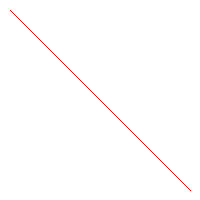

In [7]:
img = create_image()
pixel = img.load()

bresenham(
    pixel,
    10,
    10,
    190,
    190,
    (255, 0, 0),
)

display(img)
img.save('../results/line.png')

### Midpoint circle algorithm

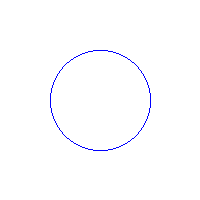

In [8]:
img = create_image()
pixel = img.load()

midpoint_circle(
    pixel,
    (WIDTH, HEIGHT),
    100,
    100,
    50,
    (0, 0, 255),
)

display(img)
img.save('../results/circle.png')

### Fill triangle algorithm (scanline algorithm)

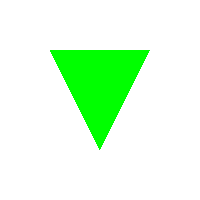

In [9]:
img = create_image()
pixel = img.load()

fill_triangle(
    pixel,
    (WIDTH, HEIGHT),
    (50, 50),
    (150, 50),
    (100, 150),
    (0, 255, 0)
)

display(img)
img.save('../results/triangle.png')